## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [69]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of Resnet 50
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [70]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [71]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [72]:
  # useful for getting number of output classes
folders = glob('Datasets/Train/*')

In [73]:
folders

['Datasets/Train\\audi',
 'Datasets/Train\\lamborghini',
 'Datasets/Train\\mercedes']

In [74]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [75]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [76]:

# view the structure of the model
model.summary()


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [77]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [78]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [79]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [68]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [57]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
2/2 [==============================] - 31s 15s/step - loss: 7.6399 - acc: 0.5312 - val_loss: 10.2707 - val_acc: 0.3276
Epoch 2/20
2/2 [==============================] - 27s 13s/step - loss: 4.5706 - acc: 0.7656 - val_loss: 5.3917 - val_acc: 0.3276
Epoch 3/20
2/2 [==============================] - 25s 13s/step - loss: 3.3340 - acc: 0.7188 - val_loss: 8.2840 - val_acc: 0.3276
Epoch 4/20
2/2 [==============================] - 24s 12s/step - loss: 1.7451 - acc: 0.8594 - val_loss: 13.9577 - val_acc: 0.3276
Epoch 5/20
2/2 [==============================] - 24s 12s/step - loss: 0.0088 - acc: 1.0000 - val_loss: 19.3143 - val_acc: 0.3276
Epoch 6/20
2/2 [==============================] - 24s 12s/step - loss: 0.0020 - acc: 1.0000 - val_loss: 23.1438 - val_acc: 0.3276
Epoch 7/20
2/2 [==============================] - 24s 12s/step - loss: 1.0655 - acc: 0.9219 - val_loss: 25.1275 - val_acc: 0.3276
Epoch 8/20
2/2 [==============================] - 25s 12s/step - loss: 0.6237 - acc: 0.9375 

In [58]:
r.history

{'loss': [7.639890670776367,
  4.570612475275993,
  3.3340375423431396,
  1.745147943496704,
  0.008767521008848256,
  0.0019917064155379194,
  1.0655053704977036,
  0.6236889958381653,
  0.07119768275561,
  7.264302581688753e-08,
  7.380224269581959e-05,
  0.0,
  0.0002671551774254821,
  0.15175466239452362,
  0.44260504841804504,
  0.0008241040632128716,
  0.0,
  5.587934892581359e-09,
  1.168936597650827e-05,
  4.2135838157264516e-05],
 'acc': [0.53125,
  0.765625,
  0.71875,
  0.859375,
  1.0,
  1.0,
  0.921875,
  0.9375,
  0.984375,
  1.0,
  1.0,
  1.0,
  1.0,
  0.984375,
  0.984375,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [10.27074146270752,
  5.391703128814697,
  8.284049987792969,
  13.957706451416016,
  19.31429100036621,
  23.14383602142334,
  25.127507209777832,
  24.900639533996582,
  24.246882438659668,
  23.641674041748047,
  23.436718940734863,
  23.43851375579834,
  22.956083297729492,
  23.029075622558594,
  23.28335952758789,
  23.500483512878418,
  23.786020

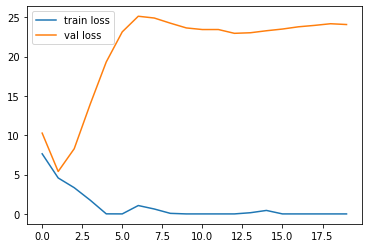

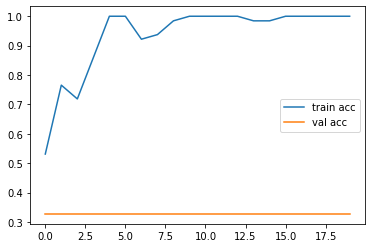

<Figure size 432x288 with 0 Axes>

In [81]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [60]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [61]:

y_pred = model.predict(test_set)


In [62]:
y_pred

array([[4.05507672e-14, 2.89784596e-17, 1.00000000e+00],
       [4.82568290e-14, 5.87170121e-17, 1.00000000e+00],
       [2.32351912e-14, 9.32610158e-18, 1.00000000e+00],
       [3.80422961e-14, 3.59224390e-17, 1.00000000e+00],
       [4.53359477e-14, 9.16755406e-17, 1.00000000e+00],
       [2.34166239e-14, 4.14388469e-17, 1.00000000e+00],
       [4.77304760e-14, 4.03275629e-17, 1.00000000e+00],
       [3.88664524e-14, 1.98980546e-17, 1.00000000e+00],
       [2.79580639e-14, 5.39607434e-17, 1.00000000e+00],
       [1.61246596e-14, 1.44992023e-17, 1.00000000e+00],
       [2.82381371e-14, 1.82605944e-17, 1.00000000e+00],
       [4.12949907e-14, 2.66932540e-17, 1.00000000e+00],
       [7.74329873e-14, 4.43249694e-17, 1.00000000e+00],
       [2.57751940e-14, 3.57702444e-17, 1.00000000e+00],
       [2.39924251e-14, 2.34909368e-17, 1.00000000e+00],
       [1.39544707e-13, 2.40819980e-15, 1.00000000e+00],
       [1.87019708e-14, 3.60784453e-17, 1.00000000e+00],
       [2.42252863e-14, 1.22347

In [63]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [64]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [42]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [43]:
model=load_model('model_resnet50.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [44]:
img_data

NameError: name 'img_data' is not defined

In [ ]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [94]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [194., 188., 174.],
        [215., 209., 197.],
        [241., 235., 223.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [247., 245., 233.],
        [245., 242., 233.],
        [244., 241., 232.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 248., 241.],
        [244., 250., 248.],
        [244., 250., 248.]],

       ...,

       [[190., 206., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[187., 205., 227.],
        [187., 205., 227.],
        [187., 205., 227.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [187., 2

In [95]:
x.shape

(224, 224, 3)

In [96]:
x=x/255

In [97]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [98]:
model.predict(img_data)

array([[0.02122196, 0.49325418, 0.4855238 ]], dtype=float32)

In [100]:
a=np.argmax(model.predict(img_data), axis=1)

In [102]:
a==1

array([ True])